In [6]:
import pandas as pd

# Carica il dataset
df = pd.read_csv("C:/Users/dante/Documents/dataset/train.csv")  # sostituisci con il nome esatto del file

# Visualizza le prime righe
df.head()
df.info()
df.isnull().sum()
df_clean=df.dropna(subset=["Postal Code"])
print(df_clean.describe())
print(df_clean.info())
analisi_completa=df_clean.groupby(["Segment","Region","Category"])["Sales"].agg([
    ("Vendite_total","sum"),
    ("Numeri_ordini","count"),
    ("Vendita_media","mean")
]).round(2)
print("Analisi Completa:")
print(analisi_completa.sort_values('Vendite_total', ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

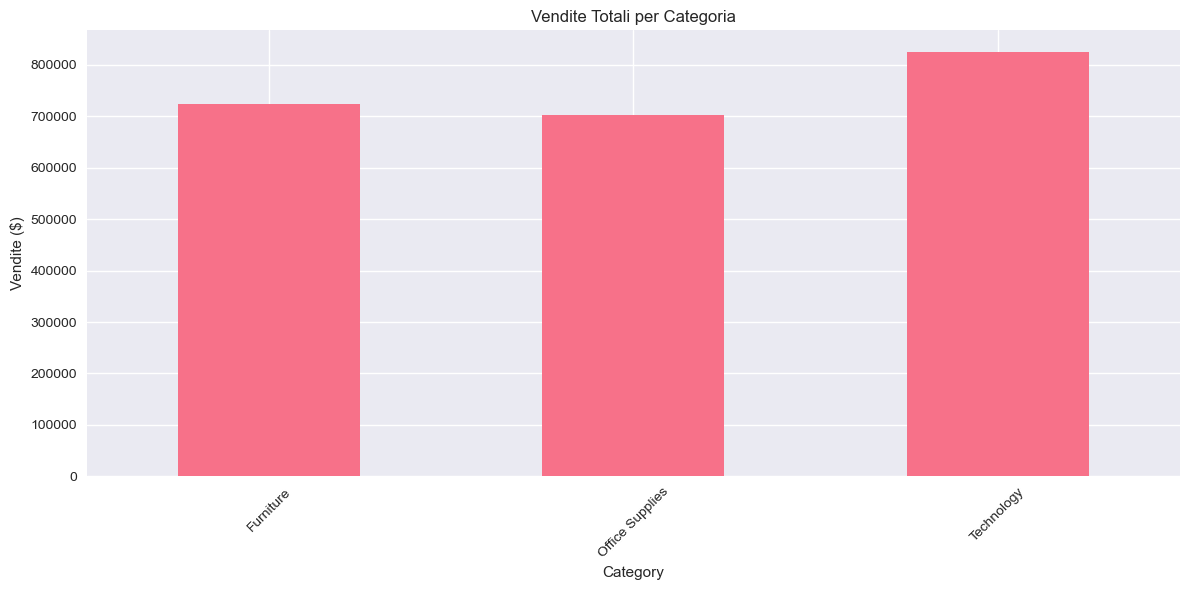

C:\Users\dante\anaconda3\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


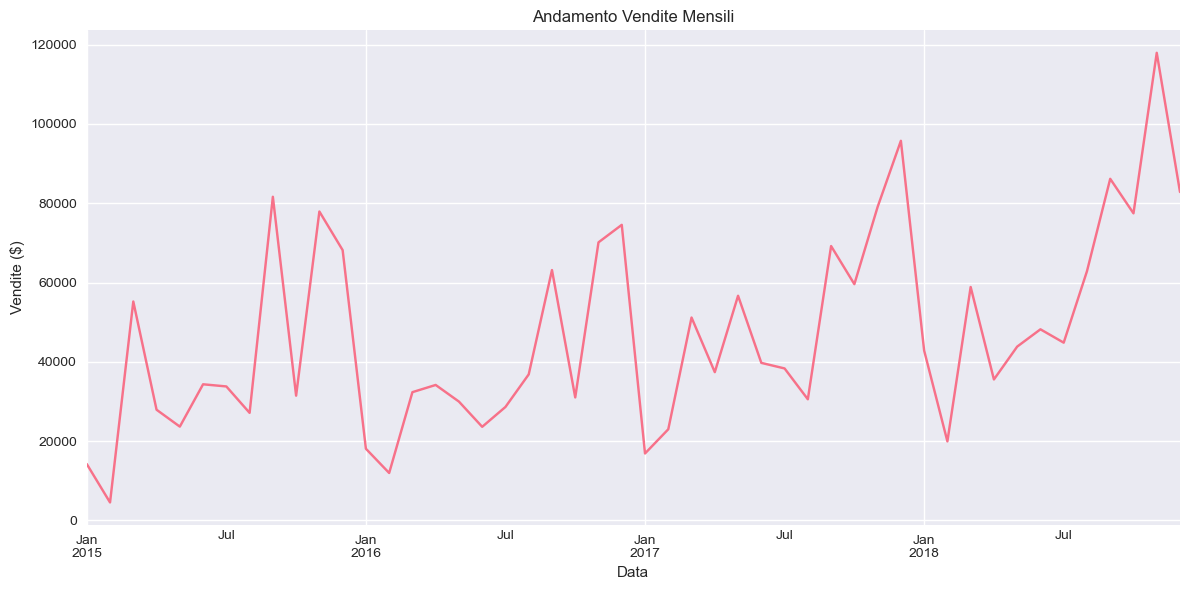

In [7]:
import pandas as pd

# Carica il dataset
df = pd.read_csv("C:/Users/dante/Documents/dataset/train.csv")  # sostituisci con il nome esatto del file

# Visualizza le prime righe
df.head()
df.info()
df.isnull().sum()
df_clean=df.dropna(subset=["Postal Code"])
print(df_clean.describe())
print(df_clean.info())
analisi_completa=df_clean.groupby(["Segment","Region","Category"])["Sales"].agg([
    ("Vendite_total","sum"),
    ("Numeri_ordini","count"),
    ("Vendita_media","mean")
]).round(2)
print("Analisi Completa:")
print(analisi_completa.sort_values('Vendite_total', ascending=False))
import pandas as pd

# Carica il dataset
df = pd.read_csv("C:/Users/dante/Documents/dataset/train.csv")  # sostituisci con il nome esatto del file

# Visualizza le prime righe
df.head()
df.info()
df.isnull().sum()

# Create a proper copy of the dataframe to avoid SettingWithCopyWarning
df_clean = df.dropna(subset=["Postal Code"]).copy()  # Added .copy() to create a true copy

print(df_clean.describe())
print(df_clean.info())
analisi_completa=df_clean.groupby(["Segment","Region","Category"])["Sales"].agg([
    ("Vendite_total","sum"),
    ("Numeri_ordini","count"),
    ("Vendita_media","mean")
]).round(2)
print("Analisi Completa:")
print(analisi_completa.sort_values('Vendite_total', ascending=False))
import matplotlib.pyplot as plt
import seaborn as sns

# Configurazione grafici
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Vendite per categoria
plt.figure(figsize=(12, 6))
df_clean.groupby('Category')['Sales'].sum().plot(kind='bar')
plt.title('Vendite Totali per Categoria')
plt.ylabel('Vendite ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Andamento vendite nel tempo
# Convert dates with dayfirst=True and use .loc to avoid the SettingWithCopyWarning
df_clean.loc[:, 'Order Date'] = pd.to_datetime(df_clean['Order Date'], dayfirst=True)

# Use 'ME' instead of 'M' for month-end frequency as recommended
vendite_mensili = df_clean.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum()

plt.figure(figsize=(12, 6))
vendite_mensili.plot()
plt.title('Andamento Vendite Mensili')
plt.ylabel('Vendite ($)')
plt.xlabel('Data')
plt.grid(True)
plt.tight_layout()
plt.show()

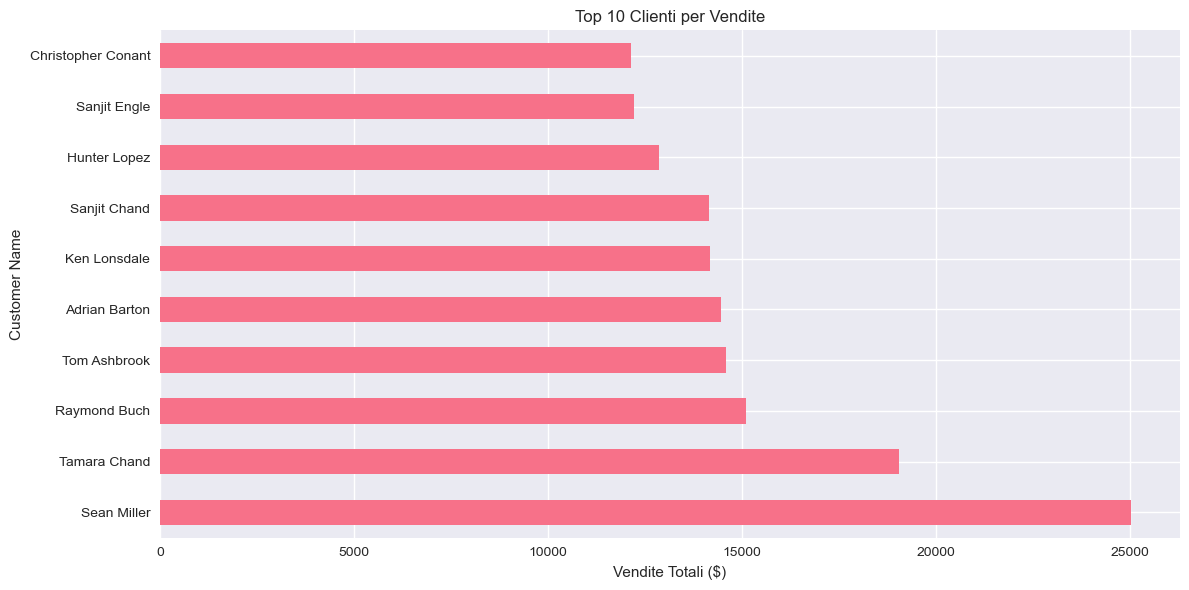

Analisi per Segmento:
                    Sales                   Customer ID
                      sum        mean count     nunique
Segment                                                
Consumer     1.146708e+06  225.021223  5096         409
Corporate    6.822118e+05  231.415141  2948         236
Home Office  4.236874e+05  242.800818  1745         148


In [8]:
# Top 10 clienti per vendite
top_clienti = df_clean.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_clienti.plot(kind='barh')
plt.title('Top 10 Clienti per Vendite')
plt.xlabel('Vendite Totali ($)')
plt.tight_layout()
plt.show()

# Analisi segmenti clienti
segment_analysis = df_clean.groupby('Segment').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Customer ID': 'nunique'
})
print("Analisi per Segmento:")
print(segment_analysis)

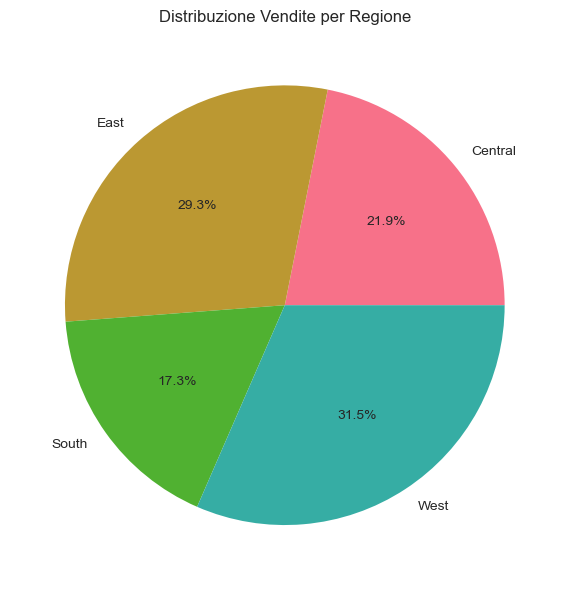

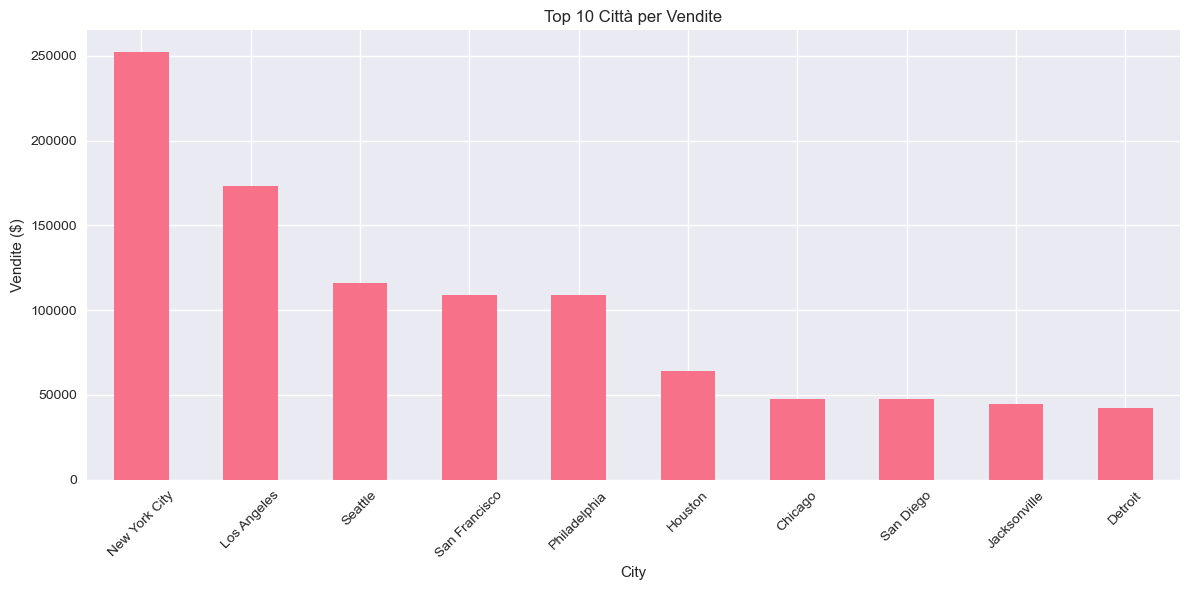

In [9]:
# Vendite per regione
plt.figure(figsize=(10, 6))
df_clean.groupby('Region')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuzione Vendite per Regione')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Top 10 città per vendite
top_cities = df_clean.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_cities.plot(kind='bar')
plt.title('Top 10 Città per Vendite')
plt.ylabel('Vendite ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

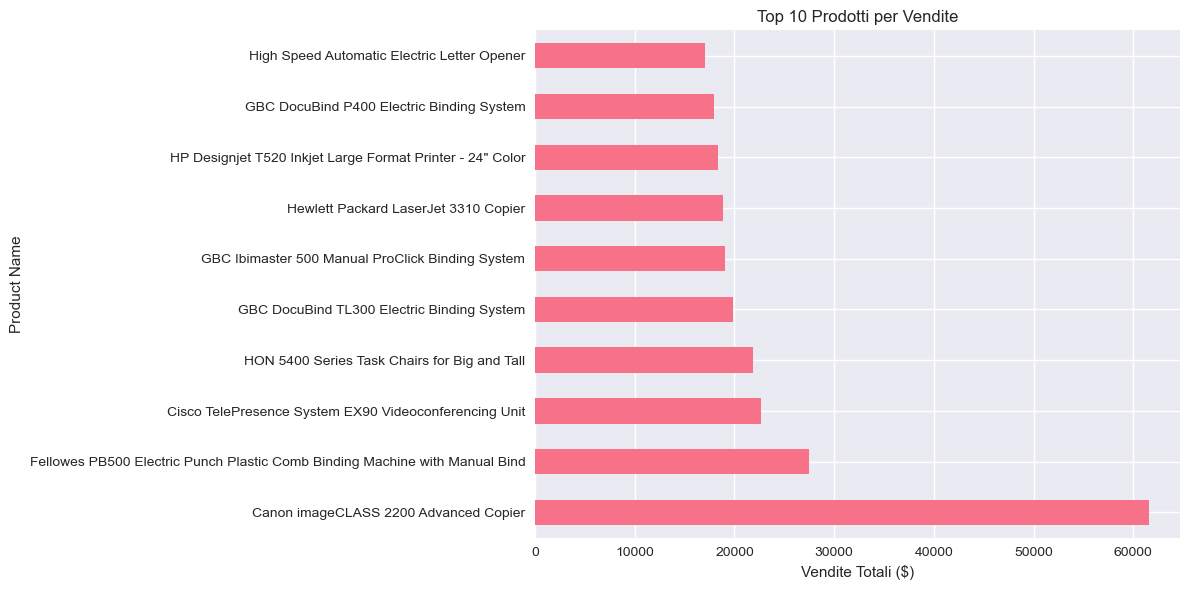

Performance Sub-Categorie:
                    Sales              Product ID
                      sum         mean      count
Sub-Category                                     
Phones        326487.6980   373.128798        875
Chairs        322107.5310   531.530579        606
Storage       217779.1020   262.068715        831
Tables        202810.6280   645.893720        314
Binders       200028.7850   134.067550       1492
Machines      189238.6310  1645.553313        115
Accessories   163881.6900   217.349721        754
Copiers       146248.0940  2215.880212         66
Bookcases     109408.2987   486.259105        225
Appliances    104075.4630   227.239002        458
Furnishings    89212.0180    95.823865        931
Paper          76736.1040    57.437204       1336
Supplies       46420.3080   252.284283        184
Art            26697.3700    34.052768        784
Envelopes      16126.0060    65.287474        247
Labels         12347.7260    34.587468        357
Fasteners       3001.96

In [10]:
# Prodotti più venduti
top_prodotti = df_clean.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_prodotti.plot(kind='barh')
plt.title('Top 10 Prodotti per Vendite')
plt.xlabel('Vendite Totali ($)')
plt.tight_layout()
plt.show()

# Analisi per sub-categoria
subcat_analysis = df_clean.groupby('Sub-Category').agg({
    'Sales': ['sum', 'mean'],
    'Product ID': 'count'
}).sort_values(('Sales', 'sum'), ascending=False)

print("Performance Sub-Categorie:")
print(subcat_analysis)

In [11]:
# Calcolo metriche chiave
metrics = {
    'Vendite Totali': df_clean['Sales'].sum(),
    'Numero Ordini': df_clean['Order ID'].nunique(),
    'Valore Medio Ordine': df_clean['Sales'].mean(),
    'Clienti Unici': df_clean['Customer ID'].nunique(),
    'Prodotti Unici': df_clean['Product ID'].nunique()
}

print("\n--- METRICHE CHIAVE ---")
for key, value in metrics.items():
    print(f"{key}: {value:,.2f}")

# Raccomandazioni basate sui dati
print("\n--- INSIGHTS E RACCOMANDAZIONI ---")
print("1. Categoria più performante:", df_clean.groupby('Category')['Sales'].sum().idxmax())
print("2. Regione con maggiori vendite:", df_clean.groupby('Region')['Sales'].sum().idxmax())
print("3. Segmento cliente più redditizio:", df_clean.groupby('Segment')['Sales'].sum().idxmax())


--- METRICHE CHIAVE ---
Vendite Totali: 2,252,607.41
Numero Ordini: 4,916.00
Valore Medio Ordine: 230.12
Clienti Unici: 793.00
Prodotti Unici: 1,860.00

--- INSIGHTS E RACCOMANDAZIONI ---
1. Categoria più performante: Technology
2. Regione con maggiori vendite: West
3. Segmento cliente più redditizio: Consumer


In [28]:
# Create a report summary
import pandas as pd
df_clean = pd.read_csv(("C:/Users/dante/Documents/dataset/train.csv"))
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])
summary_report = {
    'Dataset_Shape': df_clean.shape,
    'Periodo_Analisi': f"{df_clean['Order Date'].min().date()} to {df_clean['Order Date'].max().date()}",
    'Vendite_Totali': f"${df_clean['Sales'].sum():,.2f}",
    'Clienti_Unici': df_clean['Customer ID'].nunique(),
    'Prodotti_Venduti': df_clean['Product ID'].nunique()
}

# Save the results
df_clean.to_csv('dataset_pulito.csv', index=False)

print("\n--- REPORT COMPLETO ---")
for key, value in summary_report.items():
    print(f"{key}: {value}") 

ValueError: time data "15/04/2018" doesn't match format "%m/%d/%Y", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.